In [47]:
# set up jupyter-notebook
%load_ext autoreload
%autoreload 2

Gaussian Distribution

$$ \begin{aligned} L(\mu) &=\prod_{i=1}^{n} \frac{1}{\sqrt{2 \pi \sigma^{2}}} \exp -\frac{\left(x_{i}-\mu\right)^{2}}{2 \sigma^{2}} \\ \Rightarrow \ell(\mu) &=\sum_{i=1}^{n}\left[\log \left(\frac{1}{\sqrt{2 \pi \sigma^{2}}}\right)-\frac{\left(x_{i}-\mu\right)^{2}}{2 \sigma^{2}}\right] \\ \Rightarrow \frac{d}{d \mu} \ell(\mu) &=\sum_{i=1}^{n} \frac{x_{i}-\mu}{\sigma^{2}} \end{aligned} $$

Gaussian Mixture Models

Assume we observe X1,…,Xn and that each Xi is sampled from one of K mixture components. Associated with each random variable Xi is a label Zi∈{1,…,K} which indicates which component Xi came from. In our height example, Zi would be either 1 or 2 depending on whether Xi was a male or female height. Often times we don’t observe Zi (e.g. we might just obtain a list of heights with no gender information), so the Zi’s are sometimes called latent variables.

From the law of total probability, we know that the marginal probability of Xi is:

$$
P\left(X_{i}=x\right)=\sum_{k=1}^{K} P\left(X_{i}=x | Z_{i}=k\right) \underbrace{P\left(Z_{i}=k\right)}_{\pi k}=\sum_{k=1}^{K} P\left(X_{i}=x | Z_{i}=k\right) \pi_{k}
$$

Here, the $$
\pi_{k}
$$ are called mixture proportions or mixture weights and they represent the probability that Xi belongs to the k-th mixture component. The mixture proportions are nonnegative and they sum to one, $$
\sum_{k=1}^{K} \pi_{k}=1
$$. We call $$
P\left(X_{i} | Z_{i}=k\right)
$$) the mixture component, and it represents the distribution of Xi assuming it came from component k. The mixture components in our examples above were normal distributions.
<hr>
If we observe independent samples X1,…,Xn from this mixture, with mixture proportion vector π=(π1,π2,…,πK), then the likelihood function is:


$$ L(\pi)=\prod_{i=1}^{n} P\left(X_{i} | \pi\right)=\prod_{i=1}^{n} \sum_{k=1}^{K} P\left(X_{i} | Z_{i}=k\right) \pi_{k} $$
<hr>

first, we need to generate GMM models. 
Just recall the function of Guassian Mixture Models is:

\begin{equation}
\large
p(\mathbf x | \mathbf\mu, \mathbf\Sigma) = \frac 1 {({2\pi})^{n/2}|\Sigma|^{1/2}}\exp\left(-\frac 1 2 (\mathbf x -\mathbf\mu)^T\mathbf\Sigma^{-1}(\mathbf x -\mathbf\mu)\right)
\end{equation}

Covariance Matrics: $$ \Sigma $$

Calculation for Covariance Matrics:

$$
\mathbf{X}=\left(X_{1}, X_{2}, \ldots, X_{n}\right)^{\mathrm{T}}
$$


$$
\mathrm{K}_{\mathrm{XX}}=\left[\begin{array}{cccc}{\mathrm{E}\left[\left(X_{1}-\mathrm{E}\left[X_{1}\right]\right)\left(X_{1}-\mathrm{E}\left[X_{1}\right]\right)\right]} & {\mathrm{E}\left[\left(X_{1}-\mathrm{E}\left[X_{1}\right]\right)\left(X_{2}-\mathrm{E}\left[X_{2}\right]\right)\right]} & {\cdots} & {\mathrm{E}\left[\left(X_{1}-\mathrm{E}\left[X_{1}\right]\right)\left(X_{n}-\mathrm{E}\left[X_{n}\right]\right)\right]} \\ {\mathrm{E}\left[\left(X_{2}-\mathrm{E}\left[X_{2}\right]\right)\left(X_{1}-\mathrm{E}\left[X_{1}\right]\right)\right]} & {\mathrm{E}\left[\left(X_{2}-\mathrm{E}\left[X_{2}\right]\right)\left(X_{2}-\mathrm{E}\left[X_{2}\right]\right)\right]} & {\cdots} & {\mathrm{E}\left[\left(X_{2}-\mathrm{E}\left[X_{2}\right]\right)\left(X_{n}-\mathrm{E}\left[X_{n}\right]\right)\right]} \\ {\vdots} & {\vdots} & {\ddots} & {\vdots} \\ {\mathrm{E}\left[\left(X_{n}-\mathrm{E}\left[X_{n}\right]\right)\left(X_{1}-\mathrm{E}\left[X_{1}\right]\right)\right]} & {\mathrm{E}\left[\left(X_{n}-\mathrm{E}\left[X_{n}\right]\right)\left(X_{2}-\mathrm{E}\left[X_{2}\right]\right)\right]} & {\cdots} & {\mathrm{E}\left[\left(X_{n}-\mathrm{E}\left[X_{n}\right]\right)\left(X_{n}-\mathrm{E}\left[X_{n}\right]\right)\right]}\end{array}\right]
$$

MLE for Gaussian Mixture Models

$$
\begin{aligned} L(\mu) &=\prod_{i=1}^{n} \frac{1}{\sqrt{2 \pi \sigma^{2}}} \exp -\frac{\left(x_{i}-\mu\right)^{2}}{2 \sigma^{2}} \\ \Rightarrow \ell(\mu) &=\sum_{i=1}^{n}\left[\log \left(\frac{1}{\sqrt{2 \pi \sigma^{2}}}\right)-\frac{\left(x_{i}-\mu\right)^{2}}{2 \sigma^{2}}\right] \\ \Rightarrow \frac{d}{d \mu} \ell(\mu) &=\sum_{i=1}^{n} \frac{x_{i}-\mu}{\sigma^{2}} \end{aligned}
$$

<hr>

Now we attempt the same strategy for deriving the MLE of the Gaussian mixture model. Our unknown parameters are θ={μ1,…,μK,σ1,…,σK,π1,…,πK}, and so from the first section of this note, our likelihood is:


$$
\begin{array}{c}{L\left(\theta | X_{1}, \ldots, X_{n}\right)=\prod_{i=1}^{n} \sum_{k=1}^{K} \pi_{k} N\left(x_{i} ; \mu_{k}, \sigma_{k}^{2}\right)} \\ {\ell(\theta)=\sum_{i=1}^{n} \log \left(\sum_{k=1}^{K} \pi_{k} N\left(x_{i} ; \mu_{k}, \sigma_{k}^{2}\right)\right)}\end{array}
$$


$$
\sum_{i=1}^{n} \frac{1}{\sum_{k=1}^{K} \pi_{k} N\left(x_{i} ; \mu_{k}, \sigma_{k}\right)} \pi_{k} N\left(x_{i} ; \mu_{k}, \sigma_{k}\right) \frac{\left(x_{i}-\mu_{k}\right)}{\sigma_{k}^{2}}=0
$$

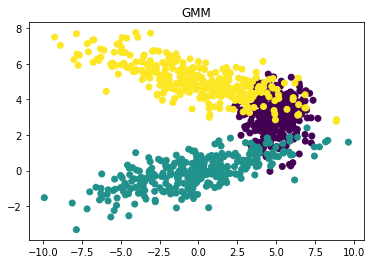

(900, 900)


In [39]:
# from sklearn import datasets
# iris = datasets.load_iris()
# X = iris.data
# print(X[:10])
# plt.scatter(X[:, 0], X[:, 1])
# plt.title('0 column and 1 colmun')
# plt.show()
# plt.scatter(X[:, 2], X[:, 3])
# plt.title('2 column and 3 colmun')
# plt.show()

import numpy as np
import matplotlib.pyplot as plt
n_samples = 300

# generate random sample, two cluster
np.random.seed(0)
# generate spherical data 
shifted_gaussian = np.random.randn(n_samples, 2) + np.array([5, 3])
# generate zero centered stretched Gaussian data
C = np.array([[0., -0.7], [3.5, .7]])
stretched_gaussian = np.dot(np.random.randn(n_samples, 2), C)
# the other one
stretched_shifted_gaussian = np.dot(np.random.randn(n_samples, 2), np.array([[0., -0.7], [-3.5, .7]])) + np.array([0, 5])

# concatenate the two datasets into the final training set
X = np.vstack([shifted_gaussian, stretched_gaussian, stretched_shifted_gaussian])

cluster = [0 for n in range(n_samples)] + [1 for n in range(n_samples)] + [2 for n in range(n_samples)]

plt.scatter(X[:, 0], X[:, 1], c=cluster)
plt.title('GMM')
plt.show()

# calculating Cov
cov_X = np.cov(X)
print(cov_X.shape)

<hr>
z is a latent variable correspinding to the probability of x(i) is from K-cluster.  

Defining the marginal distribution over z is specified in terms of the mixing coefficients $$
\pi_{k}
$$

So:
$$
p\left(z_{k}=1\right)=\pi_{k}
$$

$$
p(\mathbf{z})=\prod_{k=1}^{K} \pi_{k}^{z_{k}}
$$

<hr>
Similar:

$$
p\left(\mathbf{x} | z_{k}=1\right)=\mathcal{N}\left(\mathbf{x} | \boldsymbol{\mu}_{k}, \mathbf{\Sigma}_{k}\right)
$$

$$
p(\mathbf{x} | \mathbf{z})=\prod_{k=1}^{K} \mathcal{N}\left(\mathbf{x} | \boldsymbol{\mu}_{k}, \mathbf{\Sigma}_{k}\right)^{z_{k}}
$$
<hr>
So as for P(x) is to sum up all the joint distribution p(z)p(x|z)
$$
p(\mathbf{x})=\sum_{\mathbf{z}} p(\mathbf{z}) p(\mathbf{x} | \mathbf{z})=\sum_{k=1}^{K} \pi_{k} \mathcal{N}\left(\mathbf{x} | \boldsymbol{\mu}_{k}, \mathbf{\Sigma}_{k}\right)
$$

in this case, we need to work with the latent variable z(n) which is corresponding with x(n)

So we can work with join distribution p(x|z) instead of the marginal distribution p(x)

According to Bayes's theorem:

$$
P(A | B)=\frac{P(B | A) P(A)}{P(B)}
$$
<hr>

$$
p(\mathbf{x})=\sum_{\mathbf{z}} p(\mathbf{z}) p(\mathbf{x} | \mathbf{z})=\sum_{k=1}^{K} \pi_{k} \mathcal{N}\left(\mathbf{x} | \boldsymbol{\mu}_{k}, \mathbf{\Sigma}_{k}\right)
$$
<hr>

$$
\begin{aligned} \gamma\left(z_{k}\right) \equiv p\left(z_{k}=1 | \mathbf{x}\right) &=\frac{p\left(z_{k}=1\right) p\left(\mathbf{x} | z_{k}=1\right)}{\sum_{j=1}^{K} p\left(z_{j}=1\right) p\left(\mathbf{x} | z_{j}=1\right)} \\ &=\frac{\pi_{k} \mathcal{N}\left(\mathbf{x} | \boldsymbol{\mu}_{k}, \mathbf{\Sigma}_{k}\right)}{\sum_{j=1}^{K} \pi_{j} \mathcal{N}\left(\mathbf{x} | \boldsymbol{\mu}_{j}, \mathbf{\Sigma}_{j}\right)} \end{aligned}
$$

So the log of the likelihood function is:

$$
\ln p(\mathbf{X} | \boldsymbol{\pi}, \boldsymbol{\mu}, \mathbf{\Sigma})=\sum_{n=1}^{N} \ln \left\{\sum_{k=1}^{K} \pi_{k} \mathcal{N}\left(\mathbf{x}_{n} | \boldsymbol{\mu}_{k}, \boldsymbol{\Sigma}_{k}\right)\right\}
$$

derivatives of this log likelihood function:

$$
0=-\sum_{n=1}^{N} \underbrace{\frac{\pi_{k} \mathcal{N}\left(\mathbf{x}_{n} | \boldsymbol{\mu}_{k}, \mathbf{\Sigma}_{k}\right)}{\sum_{j} \pi_{j} \mathcal{N}\left(\mathbf{x}_{n} | \boldsymbol{\mu}_{j}, \mathbf{\Sigma}_{j}\right)}}_{\gamma\left(z_{n k}\right)} \boldsymbol{\Sigma}_{k}\left(\mathbf{x}_{n}-\boldsymbol{\mu}_{k}\right)
$$

<hr>

Be careful, maybe there is a singularity problem. Check this link:
https://stats.stackexchange.com/questions/219302/singularity-issues-in-gaussian-mixture-model
<hr>
identifiability issue

DEBUG:TestKmeanPP:[[-0.05213334  4.86079063]
 [ 5.00658414 -5.0164556 ]
 [-4.99173145 -5.08201964]]
DEBUG:TestKmeanPP:->begin to draw gaussian models


(300,) (300, 2) (300,)
(300,) (300, 2) (300,)


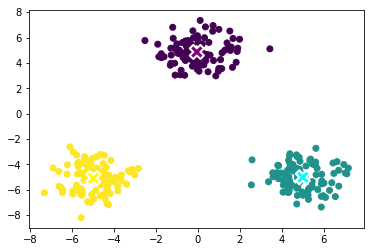

.
----------------------------------------------------------------------
Ran 1 test in 0.367s

OK


In [45]:
#import k-means
%run ../test_algorithms/test_kmean.py

(900,) (900, 2) (900,)
(900,) (900, 2) (900,)
[[ 4.50160762  2.95849499]
 [-2.17251949  5.46165051]
 [-1.57772908 -0.38899908]]


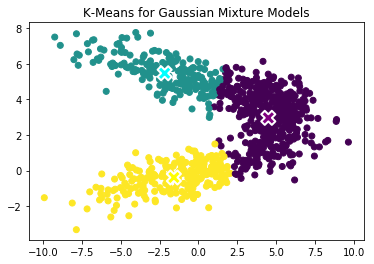

In [48]:
kpp = KMeansPP(3)
kpp.fit(X)
cluster = kpp.predict(X)

plt.scatter(X[:, 0], X[:, 1], c=cluster)
plt.scatter(kpp.centers[:, 0], kpp.centers[:, 1], s=200, marker='X', lw=2, c=['purple', 'cyan', 'yellow'],
            edgecolor="white")
plt.title('K-Means for Gaussian Mixture Models')
plt.show()

<hr>
as you can see, K-Means can't solve this GMM problem.
Now We try EM Algorithm(Expectation Maximum)
<hr>
$$
\boldsymbol{\mu}_{k}=\frac{1}{N_{k}} \sum_{n=1}^{N} \gamma\left(z_{n k}\right) \mathbf{x}_{n}
$$

$$
\boldsymbol{\Sigma}_{k}=\frac{1}{N_{k}} \sum_{n=1}^{N} \gamma\left(z_{n k}\right)\left(\mathbf{x}_{n}-\boldsymbol{\mu}_{k}\right)\left(\mathbf{x}_{n}-\boldsymbol{\mu}_{k}\right)^{\mathrm{T}}
$$

Finally, we maximize ln p(X|π, μ, Σ) with respect to the mixing coefficients πk. Here, we must take account of the constraint:

$$
\sum_{k=1}^{K} \pi_{k}=1
$$
So:
$$
\begin{array}{c}{\ln p(\mathbf{X} | \boldsymbol{\pi}, \boldsymbol{\mu}, \mathbf{\Sigma})+\lambda\left(\sum_{k=1}^{K} \pi_{k}-1\right)} \\ {0=\sum_{n=1}^{N} \frac{\mathcal{N}\left(\mathbf{x}_{n} | \boldsymbol{\mu}_{k}, \boldsymbol{\Sigma}_{k}\right)}{\sum_{j} \pi_{j} \mathcal{N}\left(\mathbf{x}_{n} | \boldsymbol{\mu}_{j}, \boldsymbol{\Sigma}_{j}\right)}+\lambda}\end{array}
$$

In [94]:
mu = np.mean(X, axis=0)
"""
np.cov bias argument
Default normalization (False) is by (N - 1), where N is the number of observations given (unbiased estimate). 
If bias is True, then normalization is by N. 
These values can be overridden by using the keyword ddof in numpy versions >= 1.5.
"""
cov = (np.cov(X.T, bias=True))
print(mu)
cov_matrics = np.array([cov for _ in range(3)])

# params = np.stack(
#     mu.ravel(),
#     cov_matrics.ravel()
    
# )
print(np.ones(10).shape)

[1.50671066 2.66859625]
(10,)


Now implement Guassian Fuction:
\begin{equation}
\large
p(\mathbf x | \mathbf\mu, \mathbf\Sigma) = \frac 1 {({2\pi})^{n/2}|\Sigma|^{1/2}}\exp\left(-\frac 1 2 (\mathbf x -\mathbf\mu)^T\mathbf\Sigma^{-1}(\mathbf x -\mathbf\mu)\right)
\end{equation}


In [110]:
d = X[:,  np.newaxis,:] - mu
print(d.shape, cov_matrics.shape)
print(np.einsum('nki,kij->nkj', X, cov_matrics))
def guass(X, cov, mu):
    pass

(900, 1, 2) (3, 2, 2)


ValueError: einstein sum subscripts string contains too many subscripts for operand 0